# DS 2023 HW 12

## Instructions

Follow the prompts in this notebook.

Make use of code provided.

Respond with code to generate your answers.
|
If asked to provide a specific response, create a Markdown cell after your code cell(s) with the response.

NOTE: To save as a PDF, first export your notebook to HTML, open it in a brower, and the print the web page to PDF.

**10 Points**

## Student Info

Write your name and computer ID below.

- NAME: Sae-Jin Moon
- ID: rhn9qs

## Compliance with Homework Submission Guidelines

1 pt

# Overview

In this week's homework, you will use summarized data from the National Public Opinion Reference Survey (NPORS) data from the Pew Foundation to create journal ready plots.

Use the CSV file attached to the Canvas assignment to complete the answers.

For more information on the survey, see [the Pew website](https://www.pewresearch.org/politics/fact-sheet/party-affiliation-fact-sheet-npors/).

For a more complete version of the data set, follow [this link to the Google Sheet](https://docs.google.com/spreadsheets/d/118jzessZIIYxbqk1VqOw3HreWZG6jTyPGGdi7u_wfjA/edit?usp=sharing).

# Tasks

## Task 0

0 pts

Set up your environment and import the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set the style to basic `white`.

In [2]:
sns.set(context='notebook', style='white')

Define a function to draw butterfly plots.

In [3]:
def butterflyplot(X, title=None, colors=['crimson','royalblue']):

    L, R = X.columns.tolist()

    # Define figure parameters
    fig = plt.figure(figsize=(10, len(X)/2 + 1))
    
    # Create an axes to draw on
    ax = plt.subplot()
    
    # Plot the bars, flipping the left with negation
    ax.barh(y=X.index, width=-X[L], alpha=.75, color=colors[0], label=L)
    ax.barh(y=X.index, width=+X[R], alpha=.75, color=colors[1], label=R)
    
    # Create individual bar text labels
    text_props = {'c': 'black', 'va': 'center'}
    for y in X.index:
        x1 = X.loc[y, L]
        x2 = X.loc[y, R]
        x1_label = str(round(x1))
        x2_label = str(round(x2))
        ax.text(-x1, y, x1_label, **text_props, ha='right')
        ax.text(+x2, y, x2_label, **text_props, ha='left')
    
    plt.legend(frameon=False)
    
    # Reduce ink
    sns.despine(left=True, bottom=True)
    ax.set_xticks([])
    ax.grid(axis='y', color='#F0F0F0', ls='--')

    if title:
        plt.title(title)

    return ax

Import the survey data.

In [4]:
SURVEY = pd.read_csv("NPORS-summary.csv").set_index(['category', 'demographic'])
SURVEY.head()

republican  democrat  independant  other  \
category demographic                                                     
1        All RVs                      32        33           25      8   
2        Men                          33        29           29      9   
         Women                        31        37           22      8   
3        White, non-Hispanic          40        27           26      7   
         Hispanic                     21        41           26     11   

                              rep_lean_rep  dem_lean_dem  
category demographic                                      
1        All RVs                        48            49  
2        Men                            52            46  
         Women                          44            51  
3        White, non-Hispanic            56            41  
         Hispanic                       35            61

Create a table of the categories. This will help in subselecting the data.

In [5]:
CATS = SURVEY.reset_index().groupby(['category']).demographic.apply(lambda x: ' | '.join(x)).to_frame('demo_list')
CATS['demo_count'] = SURVEY.reset_index().groupby(['category']).demographic.count()
CATS

,demo_list,demo_count
category,,
1,All RVs,1
2,Men | Women,2
3,"White, non-Hispanic | Hispanic | Black, non-Hi...",4
4,White men | White women | Hispanic men | Hispa...,8
5,College degree or more | No college degree | P...,6
6,"White, non-Hispanic, college degree or more | ...",8
7,"Men, college degree or more | Women, college d...",4
8,18-29 | 30-49 | 50-64 | 65+,4
9,Men ages 18-29 | Women ages 18-29 | Men ages 3...,8


## Task 1

1 pt

Use the `butterflyplot` function to show the difference between `Men` and `Women` (category 2) with respect to the features `rep_lean_rep` and `dem_lean_dem`. Just call the function without making any changes to what it returns.

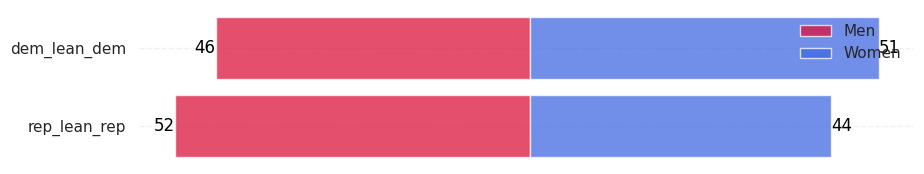

In [6]:
cat2_data = SURVEY.loc[2][['rep_lean_rep', 'dem_lean_dem']]
butterflyplot(cat2_data.T)
plt.show()

## Task 2

1 pt

Display the same plot, but now move the legend to the right of the bars so it does not cover them.

Use the `plt.legend()` function to modify the legend.

Also, give the plot the title, ""Political Orientation of US Men vs Women".

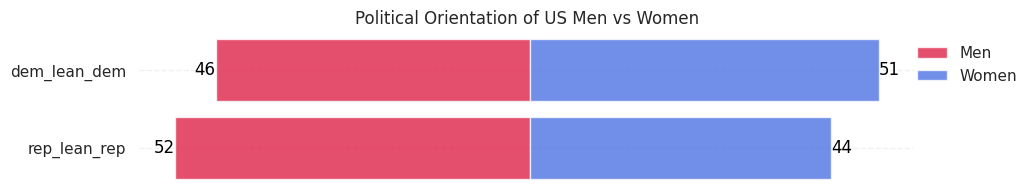

In [7]:
cat2_data = SURVEY.loc[2][['rep_lean_rep', 'dem_lean_dem']]
ax = butterflyplot(cat2_data.T, title="Political Orientation of US Men vs Women")
ax.legend(frameon=False, bbox_to_anchor=(1.15, 1))
plt.show()

## Task 3

1 pt

Now increase the font size of the y-axis tick labels to 14 and the title to 16.

Note, there are a couple of functions you can use to adjust the tick labels. One is `plt.yticks()`.

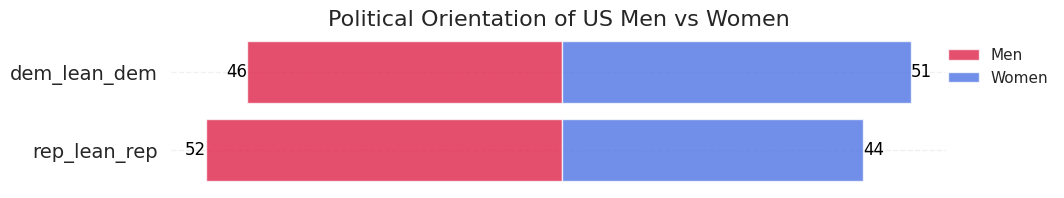

In [8]:
cat2_data = SURVEY.loc[2][['rep_lean_rep', 'dem_lean_dem']]
ax = butterflyplot(cat2_data.T, title="Political Orientation of US Men vs Women")
ax.legend(frameon=False, bbox_to_anchor=(1.15, 1))
plt.yticks(fontsize=14)
ax.title.set_fontsize(16)
plt.show()

## Task 4

1 pt

Now plot the demographics associated with group 9 against the same features.

Adjust the legend and fonts as you did in the previous two tasks.

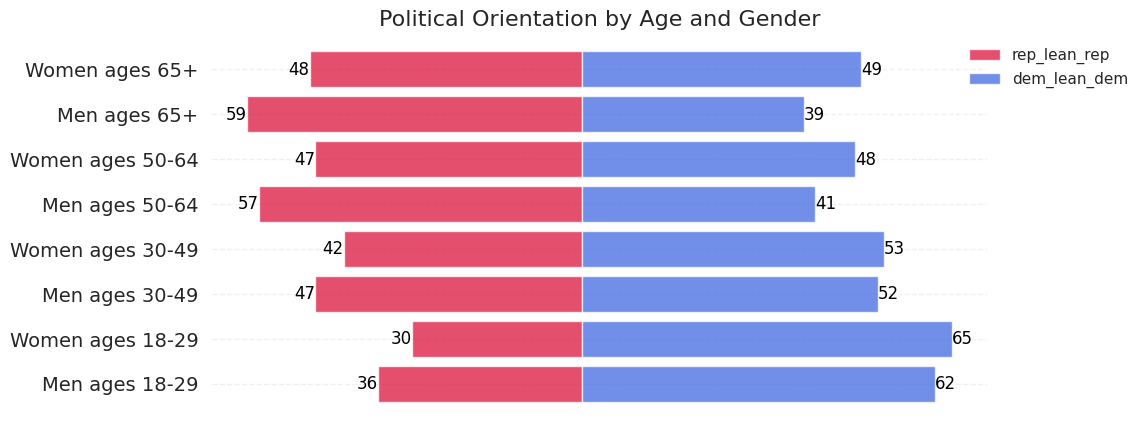

In [9]:
cat9_data = SURVEY.loc[9][['rep_lean_rep', 'dem_lean_dem']]
ax = butterflyplot(cat9_data, title="Political Orientation by Age and Gender")

ax.legend(frameon=False, bbox_to_anchor=(1.2, 1))
plt.yticks(fontsize=14)
ax.title.set_fontsize(16)

plt.show()

## Task 5

1 pt

Write below the names of the two demographics with the widest gap between them, i.e. the one with the maximum Republican percentage and the one with the maximum Democrat percentage.

**Answer**: Men ages 65+ (maximum Republican percentage) and Women ages 18-29 (maximum Democrat percentage) have the widest gap between them.

## Task 6

2 pts

Create a copy of the `butterflyplot` function above and call it `butterflyplot2`.

Modify the function so that it incorporates the changes to the legend and font sizes made in the tasks above.

Then apply it to category 10 with the same features.

Give it an appropriate title.

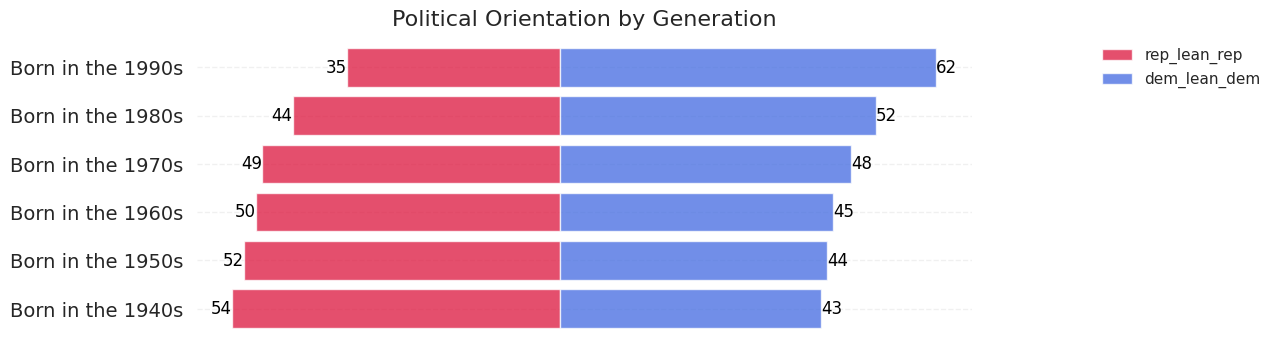

In [11]:
def butterflyplot2(X, title=None, colors=['crimson','royalblue']):
    L, R = X.columns.tolist()
    fig = plt.figure(figsize=(10, len(X)/2 + 1))
    ax = plt.subplot()
    ax.barh(y=X.index, width=-X[L], alpha=.75, color=colors[0], label=L)
    ax.barh(y=X.index, width=+X[R], alpha=.75, color=colors[1], label=R)

    text_props = {'c': 'black', 'va': 'center'}
    for y in X.index:
        x1 = X.loc[y, L]
        x2 = X.loc[y, R]
        x1_label = str(round(x1))
        x2_label = str(round(x2))
        ax.text(-x1, y, x1_label, **text_props, ha='right')
        ax.text(+x2, y, x2_label, **text_props, ha='left')

    ax.legend(frameon=False, bbox_to_anchor=(1.15, 1))
    plt.yticks(fontsize=14)
    sns.despine(left=True, bottom=True)
    ax.set_xticks([])
    ax.grid(axis='y', color='#F0F0F0', ls='--')

    if title:
        plt.title(title, fontsize=16)

    return ax

cat10_data = SURVEY.loc[10][['rep_lean_rep', 'dem_lean_dem']]
butterflyplot2(cat10_data, title="Political Orientation by Generation")
plt.show()

## Task 7

2 pts

Create a horizontal stacked bar chart showing category 11 accross the first four features of `SURVEY`.

Sort the table by the feature `republican` in ascending order.

In addition, alter the plot in the following ways:

- Assign the following colors to the bar segments:

  - Republican: `crimson`
  - Democrat: `royalblue`
  - Independent: `purple`
  - Other: `gray`

- Move the legend out of the way and remove its borders.

- Remove all the spines.

- Bump up the font sizes as done above.

- Give it a suitable title.

You may use Pandas' `plot()` method to do create your axes before altering it.

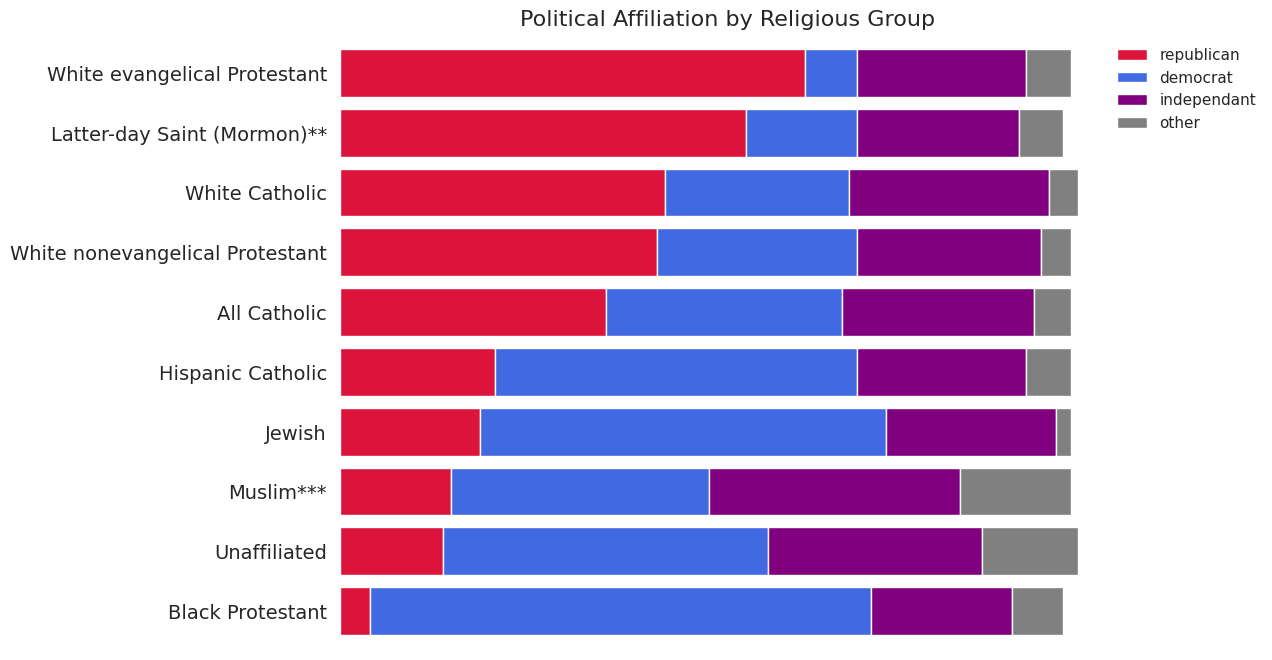

In [12]:
cat11_data = SURVEY.loc[11][['republican', 'democrat', 'independant', 'other']]
cat11_data_sorted = cat11_data.sort_values(by='republican', ascending=True)
colors = ['crimson', 'royalblue', 'purple', 'gray']
ax = cat11_data_sorted.plot(
    kind='barh',
    stacked=True,
    color=colors,
    figsize=(10, 8),
    width=0.8
)

ax.set_title("Political Affiliation by Religious Group", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.legend(frameon=False, bbox_to_anchor=(1.2, 1))
sns.despine(left=True, right=True, top=True, bottom=True)
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('')

plt.show()